## Image Tagging (Method 1 - clip)

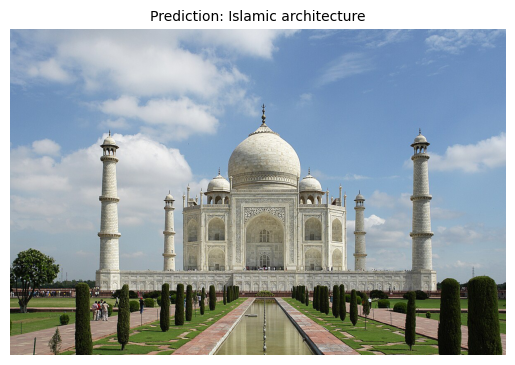

In [20]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

# Load model and image
model, preprocess = clip.load("ViT-B/32")
image_path = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Taj_Mahal_(Edited).jpeg"
raw_image = Image.open(image_path)
image = preprocess(raw_image).unsqueeze(0)

# List of string labels (architecture-related)
labels = ["mosque", "Hindu temple", "Islamic architecture", "mausoleum", "white marble building"]

# Tokenize text for CLIP
text_inputs = clip.tokenize(labels)

# Run the model
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text_inputs)

    # Calculate similarity
    probs = (image_features @ text_features.T).softmax(dim=-1)

    # Get best label
    best_index = probs.argmax().item()
    predicted_label = labels[best_index]

# 🔍 Show image and label using matplotlib
plt.imshow(raw_image)
plt.title(f"Prediction: {predicted_label}", fontsize=10)
plt.axis('off')
plt.show()

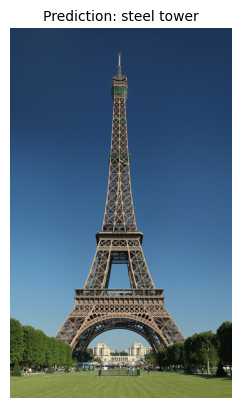

In [24]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

# Load the model
model, preprocess = clip.load("ViT-B/32")

# Path to the Eiffel Tower image
image_path = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\960px-Tour_Eiffel_Wikimedia_Commons_(cropped).jpg"

# Load and preprocess the image
raw_image = Image.open(image_path)
image = preprocess(raw_image).unsqueeze(0)

# Create descriptive architecture-related labels
labels = [
    "modern skyscraper",
    "steel tower",
    "ancient temple",
    "bridge",
    "Gothic cathedral",
    "iron lattice structure"
]

# Tokenize the labels
text_inputs = clip.tokenize(labels)

# Run the model
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text_inputs)

    # Calculate similarity and get best prediction
    probs = (image_features @ text_features.T).softmax(dim=-1)
    best_index = probs.argmax().item()
    predicted_label = labels[best_index]

# 📸 Show the image and prediction
plt.imshow(raw_image)
plt.title(f"Prediction: {predicted_label}", fontsize=10)
plt.axis('off')
plt.show()

## Image Tagging (Method 1 - YOLOv8 for Detection)

In [39]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Run object detection on an image
image_path = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Dataset 2\PROD_S1_1676199190310_thumb_800.jpeg"
results = model(image_path)
# Access the first result (since results is a list)
result = results[0]

# Print a summary of the results
print(result.summary())  # Provides a summary of the detected objects

# Show the image with detection boxes drawn
result.show()  # This will display the image with bounding boxes


image 1/1 C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Dataset 2\PROD_S1_1676199190310_thumb_800.jpeg: 448x640 1 person, 2 cars, 5 potted plants, 192.1ms
Speed: 7.0ms preprocess, 192.1ms inference, 3.9ms postprocess per image at shape (1, 3, 448, 640)
[{'name': 'potted plant', 'class': 58, 'confidence': 0.46631, 'box': {'x1': 158.09738, 'y1': 336.01807, 'x2': 250.32379, 'y2': 466.40778}}, {'name': 'person', 'class': 0, 'confidence': 0.42638, 'box': {'x1': 240.37224, 'y1': 353.01166, 'x2': 287.98813, 'y2': 440.25485}}, {'name': 'car', 'class': 2, 'confidence': 0.38594, 'box': {'x1': 342.0134, 'y1': 348.45001, 'x2': 368.36868, 'y2': 370.72815}}, {'name': 'potted plant', 'class': 58, 'confidence': 0.3571, 'box': {'x1': 528.30573, 'y1': 463.1037, 'x2': 594.10217, 'y2': 532.18011}}, {'name': 'car', 'class': 2, 'confidence': 0.31089, 'box': {'x1': 370.91721, 'y1': 353.48068, 'x2': 392.5231, 'y2': 371.60645}}, {'name': 'potted plant', 'class': 58, 'confidence'

In [43]:
import os
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Path to the folder containing the images
image_folder = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Dataset 2"
output_folder = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\outputs_dataset2"

# Make sure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Loop through each image in the folder
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)

    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Run prediction and set save_dir
        results = model.predict(image_path, save=True, project=output_folder, name="", exist_ok=True)

        # Print the summary of the results
        result = results[0]
        print(f"Results for {image_name}:")
        print(result.summary())


image 1/1 C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Dataset 2\PROD_Colourful streets in India_1720422740541_thumb_1200.jpeg: 384x640 7 persons, 227.8ms
Speed: 11.5ms preprocess, 227.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\outputs_dataset2\predict
Results for PROD_Colourful streets in India_1720422740541_thumb_1200.jpeg:
[{'name': 'person', 'class': 0, 'confidence': 0.61891, 'box': {'x1': 736.4491, 'y1': 121.31901, 'x2': 901.9743, 'y2': 261.3714}}, {'name': 'person', 'class': 0, 'confidence': 0.59589, 'box': {'x1': 767.37701, 'y1': 380.38705, 'x2': 918.57019, 'y2': 522.00604}}, {'name': 'person', 'class': 0, 'confidence': 0.59157, 'box': {'x1': 727.26068, 'y1': 226.68816, 'x2': 895.60529, 'y2': 516.1203}}, {'name': 'person', 'class': 0, 'confidence': 0.58822, 'box': {'x1': 1067.38782, 'y1': 177.62769, 'x2': 1199.5415, 'y2': 424.64

In [47]:
import os
import warnings
from transformers import pipeline

# 🔇 Suppress Hugging Face advisory and widget warnings
os.environ["TRANSFORMERS_NO_ADVISORY_WARNINGS"] = "true"
warnings.filterwarnings("ignore", category=UserWarning)

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")

# 📝 Architecture-related paragraph
text = """
Rising from the desert floor like a shard of glass piercing the sky, the Burj Khalifa stands as a symbol of modern ambition and architectural ingenuity.
Completed in 2010, the towering structure reaches a staggering height of over 828 meters, making it the tallest building in the world.
Designed by the American architectural firm Skidmore, Owings & Merrill, the structure blends Islamic design elements with ultra-modern materials like glass, aluminum, and reinforced concrete.
It serves not only as a commercial skyscraper but also houses luxury residences, corporate suites, and the Armani Hotel.
The tower’s slender, tapering shape was inspired by the Hymenocallis flower and was engineered to reduce wind load by staggering its setbacks.
As a beacon of vertical urbanism, it redefines what is possible in dense city environments and has influenced skyline design worldwide.
Dubai’s rapid urban transformation finds its perfect metaphor in the Burj Khalifa — a gleaming icon of architectural progress rising from humble beginnings.
"""

# 🏷 Architecture-related labels
labels = [
    "modern architecture",
    "skyscraper",
    "Islamic design",
    "tourist attraction",
    "gothic",
    "historic architecture",
    "bridge",
    "mosque"
]

# Run zero-shot classification
result = classifier(text, candidate_labels=labels)

# Display result
print("📊 Classification Result:")
for label, score in zip(result['labels'], result['scores']):
    print(f"{label}: {score:.4f}")

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


📊 Classification Result:
modern architecture: 0.6150
skyscraper: 0.2870
Islamic design: 0.0252
tourist attraction: 0.0238
gothic: 0.0167
historic architecture: 0.0129
bridge: 0.0125
mosque: 0.0068


In [49]:
import os
import warnings
from transformers import pipeline

# 🔇 Suppress Hugging Face advisory and widget warnings
os.environ["TRANSFORMERS_NO_ADVISORY_WARNINGS"] = "true"
warnings.filterwarnings("ignore", category=UserWarning)

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification")

# 📝 Architecture-related paragraph
text = """
Stretching thousands of miles across the rugged mountains and desert terrain of northern China, the Great Wall is one of the most enduring symbols of ancient engineering and imperial might.
Built over centuries beginning in the 7th century BC and expanded by various dynasties, most notably the Ming, the Wall was originally constructed to protect Chinese states from invading nomadic tribes.
Its formidable presence—crafted from stone, brick, tamped earth, and wood—snakes across hilltops and valleys, integrating watchtowers, barracks, and signaling systems.
Beyond its defensive function, the Wall also served as a means of border control and trade regulation along the Silk Road.
The architectural complexity and scale of the Great Wall reveal not only military strategy but also the social organization and ambition of early Chinese civilization.
Today, it stands as a UNESCO World Heritage site and a testament to human perseverance, attracting millions of visitors each year as a powerful emblem of China's historical legacy.
"""

# 🏷 Architecture-related labels
labels = [
    "modern architecture",
    "skyscraper",
    "Islamic design",
    "tourist attraction",
    "gothic",
    "historic architecture",
    "bridge",
    "mosque"
]

# Run zero-shot classification
result = classifier(text, candidate_labels=labels)

# Display result
print("📊 Classification Result:")
for label, score in zip(result['labels'], result['scores']):
    print(f"{label}: {score:.4f}")

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


📊 Classification Result:
historic architecture: 0.5685
tourist attraction: 0.3770
gothic: 0.0193
bridge: 0.0132
skyscraper: 0.0066
modern architecture: 0.0054
mosque: 0.0052
Islamic design: 0.0047


In [53]:
import spacy
from spacy import displacy

# Load the English NER model
nlp = spacy.load("en_core_web_sm")

# Long paragraph on computational architecture
text = """
Computational architecture is transforming how buildings are conceived, designed, and constructed in the 21st century. 
At institutions like MIT and ETH Zurich, researchers are developing algorithms that enable generative design, allowing architects to explore thousands of structural configurations in real time. 
Using tools such as Grasshopper for Rhino and Autodesk's Dynamo, parametric design has become a key strategy in producing responsive and adaptive structures. 
One of the most iconic examples is Zaha Hadid Architects' use of digital fabrication in the Heydar Aliyev Center in Baku, where seamless curvatures and organic forms were made possible by CNC milling and 3D modeling. 
Meanwhile, at the Architectural Association in London, students are pushing the boundaries of robotic assembly and material simulation. 
With firms like BIG and Foster + Partners integrating AI-driven sustainability analyses, computational architecture now intersects with data science, machine learning, and smart material technologies.
"""

# Process the text
doc = nlp(text)

# Print paragraph with entity highlights and labels
print("Paragraph with highlights and labels:\n")

# Iterate through the entities and display them with the labels
for ent in doc.ents:
    # Highlight the text with the entity and point to its label
    print(f"{ent.text} → {ent.label_}")
    
# To display the paragraph with highlights visually, we can use displacy
displacy.render(doc, style='ent', jupyter=True)

Paragraph with highlights and labels:

the 21st century → DATE
MIT → ORG
ETH Zurich → PERSON
thousands → CARDINAL
Rhino → PERSON
Autodesk → PERSON
Dynamo → FAC
One → CARDINAL
Zaha Hadid Architects' → PERSON
the Heydar Aliyev Center → ORG
Baku → GPE
3D → ORG
the Architectural Association → ORG
London → GPE
Foster + Partners → ORG


In [55]:
import spacy
from spacy import displacy

# Load the English NER model
nlp = spacy.load("en_core_web_sm")

# New paragraph on smart cities and urban planning
text = """
Smart cities are revolutionizing urban planning by integrating advanced technologies to improve the quality of life for citizens. 
In cities like Singapore and Barcelona, the adoption of IoT sensors, data analytics, and AI-driven systems has made traffic management, waste collection, and energy consumption more efficient. 
Architects and urban planners are using simulation software such as CityEngine and UrbanSim to design neighborhoods that are both sustainable and adaptable to future needs. 
The development of green buildings, like the Bosco Verticale in Milan, demonstrates how vertical forests can mitigate air pollution and foster biodiversity in dense urban environments. 
Cities like Tokyo and New York have started implementing smart grid systems, enabling real-time energy distribution based on demand, reducing waste, and optimizing energy consumption.
"""

# Process the text
doc = nlp(text)

# Print paragraph with entity highlights and labels
print("Paragraph with highlights and labels:\n")

# Iterate through the entities and display them with the labels
for ent in doc.ents:
    # Highlight the text with the entity and point to its label
    print(f"{ent.text} → {ent.label_}")
    
# To display the paragraph with highlights visually, we can use displacy
displacy.render(doc, style='ent', jupyter=True)

Paragraph with highlights and labels:

Smart → ORG
Singapore → GPE
Barcelona → GPE
IoT → ORG
AI → GPE
CityEngine → ORG
UrbanSim → ORG
the Bosco Verticale → FAC
Milan → GPE
Tokyo → GPE
New York → GPE


In [65]:
import sqlite3
import os
from tqdm import tqdm

# Main folder containing the subfolders with .txt files
main_folder_path = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Dataset 3"
# List to store all the text data
text_data = []

# Recursively go through all subfolders and files using os.walk()
for root, dirs, files in tqdm(os.walk(main_folder_path), desc="Reading files", unit="file"):
    for filename in files:
        if filename.endswith(".txt"):  # Only process .txt files
            file_path = os.path.join(root, filename)  # Get the full path of the file
            with open(file_path, "r", encoding="utf-8") as file:
                text = file.read()
                text_data.append({"filename": filename, "content": text})

# Check if the text data is populated
print(f"Found {len(text_data)} files to insert.")

# Connect to SQLite (it will create a new DB file if it doesn't exist)
conn = sqlite3.connect("text_files.db")
cursor = conn.cursor()

# Create a table to store file data (filename and content)
cursor.execute('''
CREATE TABLE IF NOT EXISTS text_files (
    id INTEGER PRIMARY KEY,
    filename TEXT,
    content TEXT
)
''')

# If there is data to insert, proceed with the insertion process
if text_data:
    # Insert the text data from the files into the database with a progress bar
    for entry in tqdm(text_data, desc="Inserting into SQLite", unit="file"):
        cursor.execute("INSERT INTO text_files (filename, content) VALUES (?, ?)", 
                       (entry['filename'], entry['content']))
    
    # Commit the changes after the loop finishes
    conn.commit()
else:
    print("No data to insert.")

# Query to find files containing the word "architecture" in their content
search_term = "architecture"
cursor.execute("SELECT filename, content FROM text_files WHERE content LIKE ?", ('%' + search_term + '%',))

# Fetch and print results
results = cursor.fetchall()
print(f"Files that contain the word '{search_term}':")
for row in results:
    print(f"Filename: {row[0]}, Content: {row[1]}")

# Close connection
conn.close()

Reading files: 4file [00:07,  1.99s/file]


Found 1500 files to insert.


Inserting into SQLite: 100%|████████████████████████████████████████████████████| 1500/1500 [00:10<00:00, 141.18file/s]
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [91]:
import os
from whoosh import index
from whoosh.fields import Schema, TEXT
from whoosh.qparser import QueryParser, OrGroup

folder_path = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Dataset 3"

# Define a schema for indexing text files with Whoosh
schema = Schema(
    filename=TEXT(stored=True),
    content=TEXT(stored=True)
)

index_dir = "whoosh_index"
if not os.path.exists(index_dir):
    os.mkdir(index_dir)

# Create or open the Whoosh index
ix = index.create_in(index_dir, schema)

# Function to index text files, including subdirectories
def index_text_files(folder_path, ix):
    writer = ix.writer()  # Create a writer to add documents to the index
    
    indexed_files_count = 0
    print("Checking the folder...")

    # Walk through the directory and its subdirectories
    for dirpath, dirnames, filenames in os.walk(folder_path):
        print(f"Checking directory: {dirpath}")
        
        for filename in filenames:
            if filename.endswith('.txt'):  # Only process .txt files
                file_path = os.path.join(dirpath, filename)
                print(f"Found file: {filename} in {dirpath}")
                
                try:
                    # Open and read the content of the text file
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                    
                    # Print content of the file for debugging (first 200 characters)
                    print(f"Indexing file: {filename}")
                    print("Content preview: ", content[:200])  # Print first 200 chars for preview
                    
                    # Index the file: storing filename and content
                    writer.add_document(filename=filename, content=content)
                    indexed_files_count += 1
                    print(f"Indexed: {filename}")
                
                except Exception as e:
                    print(f"Error reading file {filename}: {e}")
    
    writer.commit()  # Commit changes to the index
    print(f"Total files indexed: {indexed_files_count}")

# Index the text files in the folder and its subfolders
index_text_files(folder_path, ix)

# Function to search in the Whoosh index
def search_index(query_str, ix):
    # Open the index for searching
    with ix.searcher() as searcher:
        # Create a query parser for the 'content' field with case-insensitive search
        query_parser = QueryParser("content", ix.schema, group=OrGroup.factory(0.9))  # Corrected import
        query = query_parser.parse(query_str.lower())  # Convert query to lowercase
        
        # Perform the search
        results = searcher.search(query)
        
        # Display the results
        if results:
            print(f"Found {len(results)} result(s) for query '{query_str}':\n")
            for hit in results:
                print(f"Filename: {hit['filename']}")
                print(f"Content: {hit['content'][:200]}...")  # Show first 200 characters
                print("-" * 50)
        else:
            print(f"No results found for query '{query_str}'.")

# Example: Search for the term 'ruin'
search_index("ruin", ix)

Checking the folder...
Checking directory: C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Dataset 3
Checking directory: C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Dataset 3\Before 1990 f
Found file: a-guide-for-seminarians-1887_1887_hocr_searchtext.txt in C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Dataset 3\Before 1990 f
Indexing file: a-guide-for-seminarians-1887_1887_hocr_searchtext.txt
Content preview:  A
GUIDE FOR SEMINARIANS
a BY
Wa. WALTER WEBB, M.A., B.S. yer P. 29
JAMES POTT & CO., PUBLISHERS : I4 AND 16 ASTOR PLACE 1887
CopyrRiGuT, 1887, BY Wma. WALTER WEBB.
ee bev 4 (WAGS
Press of J. J. Little
Indexed: a-guide-for-seminarians-1887_1887_hocr_searchtext.txt
Found file: abbreviationsing0000twal_hocr_searchtext.txt in C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Dataset 3\Before 1990 f
Indexing file: abbreviationsing0000twal_hocr_searchtext.txt
Content

In [3]:
from flask import Flask, send_from_directory
import os

app = Flask(__name__)

# Absolute path to your images directory
IMAGE_DIR = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Bartlett_RC11_2025-main\task B\images"

@app.route('/images/<filename>')
def serve_image(filename):
    return send_from_directory(IMAGE_DIR, filename)

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Mishika\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
from flask import Flask, send_from_directory
import os

app = Flask(__name__)

IMAGE_DIR = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Bartlett_RC11_2025-main\task B\images"

@app.route('/images/<filename>')
def serve_image(filename):
    return send_from_directory(IMAGE_DIR, filename)

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [15]:
from flask import Flask, request, render_template_string
import os
from pdfminer.high_level import extract_text

app = Flask(__name__)

TEXT_DIR = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Bartlett_RC11_2025-main\task B\texts"

# Function to load text and PDF files
def load_documents(directory):
    docs = []
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        if filename.endswith('.txt'):
            with open(path, 'r', encoding='utf-8') as f:
                text = f.read()
        elif filename.endswith('.pdf'):
            try:
                text = extract_text(path)
            except:
                text = ""
        else:
            continue
        docs.append({"filename": filename, "content": text})
    return docs

# Load once at startup
documents = load_documents(TEXT_DIR)

# HTML template
html_template = """
<!doctype html>
<title>Search Engine</title>
<h2>Search Text and PDF Files</h2>
<form method="get">
  <input name="q" placeholder="Enter keyword" size="40">
  <input type="submit" value="Search">
</form>
{% if results %}
  <h3>Results for "{{ query }}":</h3>
  <ul>
  {% for doc in results %}
    <li><strong>{{ doc.filename }}</strong><br>{{ doc.content[:300] }}...</li>
  {% endfor %}
  </ul>
{% endif %}
"""

@app.route("/", methods=["GET"])
def search():
    query = request.args.get("q", "").lower()
    results = []

    if query:
        for doc in documents:
            if query in doc['content'].lower():
                results.append(doc)

    return render_template_string(html_template, results=results, query=query)

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [1]:
from flask import Flask, request, render_template_string, send_from_directory
import os
from pdfminer.high_level import extract_text

app = Flask(__name__)

TEXT_DIR = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Bartlett_RC11_2025-main\task B\texts"
IMAGE_DIR = r"C:\Users\Mishika\OneDrive - University College London\Datasets_assignement 3\Bartlett_RC11_2025-main\task B\images"

# Load .txt and .pdf documents
def load_documents(directory):
    docs = []
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        if filename.endswith('.txt'):
            with open(path, 'r', encoding='utf-8') as f:
                text = f.read()
        elif filename.endswith('.pdf'):
            try:
                text = extract_text(path)
            except:
                text = ""
        else:
            continue

        base_name = os.path.splitext(filename)[0]
        # Check for corresponding image
        image_file = next((f for f in os.listdir(IMAGE_DIR) if f.startswith(base_name)), None)

        docs.append({
            "filename": filename,
            "content": text,
            "image": image_file
        })
    return docs

documents = load_documents(TEXT_DIR)

# Route to serve images
@app.route('/images/<filename>')
def serve_image(filename):
    return send_from_directory(IMAGE_DIR, filename)

# HTML template
html_template = """
<!doctype html>
<title>Search Engine</title>
<h2>Search Text and PDF Files</h2>
<form method="get">
  <input name="q" placeholder="Enter keyword" size="40">
  <input type="submit" value="Search">
</form>
{% if results %}
  <h3>Results for "{{ query }}":</h3>
  <ul>
  {% for doc in results %}
    <li>
      <strong>{{ doc.filename }}</strong><br>
      {% if doc.image %}
        <img src="/images/{{ doc.image }}" style="max-height:100px;"><br>
      {% endif %}
      {{ doc.content[:300] }}...
    </li>
  {% endfor %}
  </ul>
{% endif %}
"""

@app.route("/", methods=["GET"])
def search():
    query = request.args.get("q", "").lower()
    results = []

    if query:
        for doc in documents:
            if query in doc['content'].lower():
                results.append(doc)

    return render_template_string(html_template, results=results, query=query)

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Mishika\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
